# IMPORTING NUMPY,PANDAS,MATPLOTLIB,SEABORN LIBRARIES

In [1]:
#import numpy,pandas,matplotlib,seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Module warnings supplies several exception classes that represent warnings.
import warnings
warnings.filterwarnings("ignore")


# set to display all the columns in the dataset None helps to display all columns
pd.set_option("display.max_columns",None)



#to run sql queries on Dataframe (SQL syntax in python environment)
import pandasql as psql

# Loading the Dataset

In [2]:
# load the smoking dataset

smokingEffect=pd.read_csv(r"C:\Users\Dlc\Desktop\AIMLDS\smoking.csv",header=0)
smokingEffect_bk=smokingEffect.copy()
#display the first five records
smokingEffect.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,73.0,94.0,215.0,82.0,73.0,126.0,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,70.0,130.0,192.0,115.0,42.0,127.0,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,86.0,89.0,242.0,182.0,55.0,151.0,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,60.0,96.0,322.0,254.0,45.0,226.0,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,74.0,80.0,184.0,74.0,62.0,107.0,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [3]:
smokingEffect.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

In [4]:
#display the shape of the dataset
smokingEffect.shape

(55692, 27)

In [5]:
smokingEffect.nunique()

ID                     55692
gender                     2
age                       14
height(cm)                13
weight(kg)                22
waist(cm)                566
eyesight(left)            19
eyesight(right)           17
hearing(left)              2
hearing(right)             2
systolic                 130
relaxation                95
fasting blood sugar      276
Cholesterol              286
triglyceride             390
HDL                      126
LDL                      289
hemoglobin               145
Urine protein              6
serum creatinine          38
AST                      219
ALT                      245
Gtp                      488
oral                       1
dental caries              2
tartar                     2
smoking                    2
dtype: int64

# Checking for Duplicated Records

In [6]:
#displaying the duplicate values in the dataset
smokingEffect_dup=smokingEffect[smokingEffect.duplicated(keep="last")]
#display the duplicat records
smokingEffect_dup

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking


# Checking For Null Values

In [7]:
smokingEffect.isnull().sum()
#no null values

ID                     0
gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64

# Outliers

In [8]:
#eliminate the outliers in   CSinMPa  and write data in to new file
smokingEffect_UL=round(smokingEffect.smoking.mean()+3*smokingEffect.smoking.std(),3)
smokingEffect_LL=round(smokingEffect.smoking.mean()-3*smokingEffect.smoking.std(),3)
smokingEffect_new=smokingEffect[(smokingEffect.smoking>smokingEffect_LL)&(smokingEffect.smoking<smokingEffect_UL)]
smokingEffect_bk=smokingEffect_new
smokingEffect_new.shape

(55692, 27)

# Conversion of Categorial varibles to Numerical(discrete variables)

In [9]:

#display the 'gender' variable count 
smokingEffect['gender'].value_counts()

M    35401
F    20291
Name: gender, dtype: int64

In [10]:
#display the 'oral' variable count 
smokingEffect['oral'].value_counts()

Y    55692
Name: oral, dtype: int64

In [11]:
#display the 'tartar' variable count 
smokingEffect['tartar'].value_counts()

Y    30940
N    24752
Name: tartar, dtype: int64

In [12]:
smokingEffect['gender'] = smokingEffect['gender'].map({'M':0,'F':1})
smokingEffect['oral'] = smokingEffect['oral'].map({'Y':0})
smokingEffect['tartar'] = smokingEffect['tartar'].map({'Y':0,'N':1})

In [13]:
smokingEffect

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,1,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,73.0,94.0,215.0,82.0,73.0,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,0,0,0
1,1,1,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,70.0,130.0,192.0,115.0,42.0,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,0,0,0
2,2,0,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,86.0,89.0,242.0,182.0,55.0,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,0,1,1
3,3,0,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,60.0,96.0,322.0,254.0,45.0,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,0,0,0
4,4,1,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,74.0,80.0,184.0,74.0,62.0,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,55676,1,40,170,65,75.0,0.9,0.9,1.0,1.0,110.0,68.0,89.0,213.0,99.0,75.0,118.0,12.3,1.0,0.6,14.0,7.0,10.0,0,1,0,0
55688,55681,1,45,160,50,70.0,1.2,1.2,1.0,1.0,101.0,62.0,89.0,166.0,69.0,73.0,79.0,14.0,1.0,0.9,20.0,12.0,14.0,0,0,0,0
55689,55683,1,55,160,50,68.5,1.0,1.2,1.0,1.0,117.0,72.0,88.0,158.0,77.0,79.0,63.0,12.4,1.0,0.5,17.0,11.0,12.0,0,0,1,0
55690,55684,0,60,165,60,78.0,0.8,1.0,1.0,1.0,133.0,76.0,107.0,210.0,79.0,48.0,146.0,14.4,1.0,0.7,20.0,19.0,18.0,0,0,1,0


In [14]:
smokingEffect.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  int64  
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

In [15]:
#count the target or independent variable by "0" & "1" and their proportion
#(>=10:1, then the dataset is imbalnce data)
smoking_count=smokingEffect.smoking.value_counts()
print("class0:",smoking_count[0])
print("class1:",smoking_count[1])
print("Proportion:",round(smoking_count[0]/smoking_count[1],2),":1")
print("Total smoking Records:",len(smokingEffect))

class0: 35237
class1: 20455
Proportion: 1.72 :1
Total smoking Records: 55692


In [16]:
smokingEffect

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,1,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,73.0,94.0,215.0,82.0,73.0,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,0,0,0
1,1,1,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,70.0,130.0,192.0,115.0,42.0,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,0,0,0
2,2,0,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,86.0,89.0,242.0,182.0,55.0,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,0,1,1
3,3,0,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,60.0,96.0,322.0,254.0,45.0,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,0,0,0
4,4,1,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,74.0,80.0,184.0,74.0,62.0,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,55676,1,40,170,65,75.0,0.9,0.9,1.0,1.0,110.0,68.0,89.0,213.0,99.0,75.0,118.0,12.3,1.0,0.6,14.0,7.0,10.0,0,1,0,0
55688,55681,1,45,160,50,70.0,1.2,1.2,1.0,1.0,101.0,62.0,89.0,166.0,69.0,73.0,79.0,14.0,1.0,0.9,20.0,12.0,14.0,0,0,0,0
55689,55683,1,55,160,50,68.5,1.0,1.2,1.0,1.0,117.0,72.0,88.0,158.0,77.0,79.0,63.0,12.4,1.0,0.5,17.0,11.0,12.0,0,0,1,0
55690,55684,0,60,165,60,78.0,0.8,1.0,1.0,1.0,133.0,76.0,107.0,210.0,79.0,48.0,146.0,14.4,1.0,0.7,20.0,19.0,18.0,0,0,1,0


# Deletion of the variables which donot impact the Target Variable

In [17]:
# Delte the unnamed column and variables which are not impacting the target variable
del smokingEffect['ID']
smokingEffect.head()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,1,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,73.0,94.0,215.0,82.0,73.0,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,0,0,0
1,1,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,70.0,130.0,192.0,115.0,42.0,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,0,0,0
2,0,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,86.0,89.0,242.0,182.0,55.0,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,0,1,1
3,0,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,60.0,96.0,322.0,254.0,45.0,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,0,0,0
4,1,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,74.0,80.0,184.0,74.0,62.0,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,0,1,0


In [18]:
#identify the independent and target variables
IndepVari=[]
for col in smokingEffect.columns:
    if col != 'smoking':
        IndepVari.append(col)
TarVar='smoking'
x=smokingEffect[IndepVari]
y=smokingEffect[TarVar]

In [19]:
# Split the data into train and test (random sampling)

from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Display the shape for train & test data

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((38984, 25), (16708, 25), (38984,), (16708,))

In [20]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train = mmscaler.fit_transform(x_train)
#x_train[cols1]=mmscaler.fit_transform(x_train[cols1])
x_train = pd.DataFrame(x_train)

x_test = mmscaler.fit_transform(x_test)
#x_test[cols1]=mmscaler.fit_transform(x_test[cols1])
x_test = pd.DataFrame(x_test)

# Logistic Regession

In [21]:
#to build the "logistic Regression" nodel with random sampling
from sklearn.linear_model import LogisticRegression
#create an object for the model
ModelLR= LogisticRegression()
#NodeLLR= LogisticRegression(penalty="l2",dual=False.to=0.0001,c=1.0,fit_intercept=True,intercept_scaling=1,
#                             class_weight=None,random_state=None,solver="lbfgs",max_iter=100,multi_class="auto",
#                             verbose=0,warm_start=False,n_jobs=None,l1_ratio=None)
#train the model
ModelLR.fit(x_train,y_train)
#predict the nodel with the test dataset
y_pred=ModelLR.predict(x_train)
y_pred_prob=ModelLR.predict_proba(x_test)

In [22]:
#to display the algorithms parameters
params=ModelLR.get_params()
print(params)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


Confusion Matrix:
 [[5770  381]
 [4479 6078]]
Outcome Values:
 5770 381 4479 6078
Classification Report:
               precision    recall  f1-score   support

           1       0.56      0.94      0.70      6151
           0       0.94      0.58      0.71     10557

    accuracy                           0.71     16708
   macro avg       0.75      0.76      0.71     16708
weighted avg       0.80      0.71      0.71     16708

Accuracy: 70.9 %
Precision: 56.3 %
Recall: 93.8 %
F1 Score: 0.704
Specificity or True Negative Rate: 57.6 %
Balanced Accuracy: 75.7 %
MCC: 0.509
ROC AUC Score: 0.821


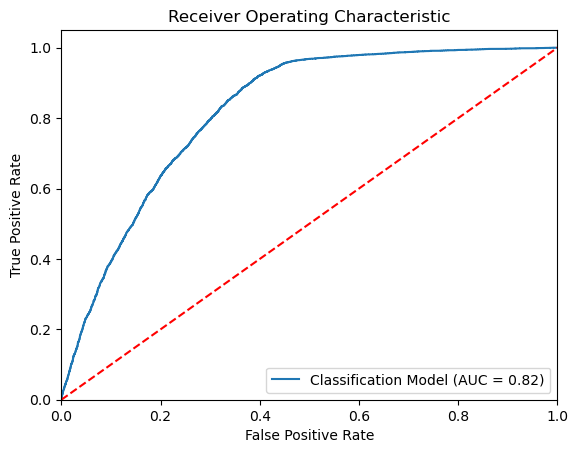

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Create an object for the model
ModelLR = LogisticRegression()

# Train the model
ModelLR.fit(x_train, y_train)

# Predict with the test dataset
y_pred = ModelLR.predict(x_test)
y_pred_prob = ModelLR.predict_proba(x_test)

# Confusion matrix
matrix = confusion_matrix(y_test, y_pred, labels=[1, 0])
print("Confusion Matrix:\n", matrix)

# Outcome values order in sklearn
tp, fn, fp, tn = matrix.ravel()
print("Outcome Values:\n", tp, fn, fp, tn)

# Classification report for precision, recall, f1-score, and accuracy
C_Report = classification_report(y_test, y_pred, labels=[1, 0])
print("Classification Report:\n", C_Report)

# Calculate the metrics
sensitivity = round(tp / (tp + fn), 3)
specificity = round(tn / (tn + fp), 3)
accuracy = round((tp + tn) / (tp + fp + tn + fn), 3)
balanced_accuracy = round((sensitivity + specificity) / 2, 3)
precision = round(tp / (tp + fp), 3)
f1Score = round((2 * tp / (2 * tp + fp + fn)), 3)

# Matthews Correlation Coefficient (MCC)
from math import sqrt
mx = (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy:', round(accuracy * 100, 2), '%')
print('Precision:', round(precision * 100, 2), '%')
print('Recall:', round(sensitivity * 100, 2), '%')
print('F1 Score:', f1Score)
print('Specificity or True Negative Rate:', round(specificity * 100, 2), '%')
print('Balanced Accuracy:', round(balanced_accuracy * 100, 2), '%')
print('MCC:', MCC)

# Area under the ROC curve
auc_score = round(roc_auc_score(y_test, y_pred_prob[:, 1]), 3)
print('ROC AUC Score:', auc_score)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1])
plt.plot(fpr, tpr, label='Classification Model (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# KNN Algorithm

In [24]:
#load the result dataset for KNN
KNN_Results=pd.read_csv(r"C:\Users\Dlc\Desktop\AIMLDS\KNN_Results.csv",header=0)

KNN_K_value =  1
Model Name:  KNeighborsClassifier(n_neighbors=1)
Confusion matrix : 
 [[3985 2166]
 [2908 7649]]
Outcome values : 
 3985 2166 2908 7649
Classification report : 
               precision    recall  f1-score   support

           1       0.58      0.65      0.61      6151
           0       0.78      0.72      0.75     10557

    accuracy                           0.70     16708
   macro avg       0.68      0.69      0.68     16708
weighted avg       0.71      0.70      0.70     16708

Accuracy : 69.6 %
Precision : 57.8 %
Recall : 64.8 %
F1 Score : 0.611
Specificity or True Negative Rate : 72.5 %
Balanced Accuracy : 68.6 %
MCC : 0.365
roc_auc_score: 0.686


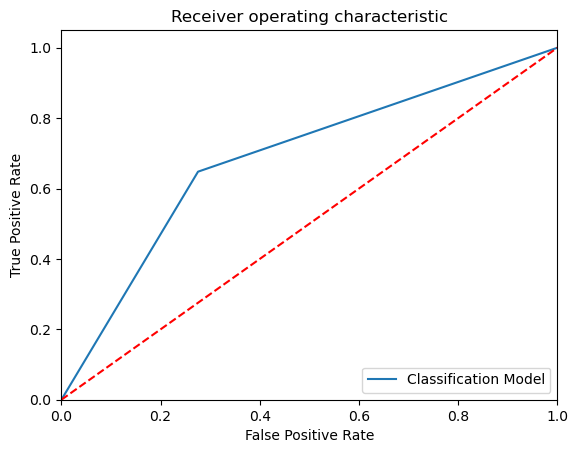

KNN_K_value =  2
Model Name:  KNeighborsClassifier(n_neighbors=2)
Confusion matrix : 
 [[2978 3173]
 [1744 8813]]
Outcome values : 
 2978 3173 1744 8813
Classification report : 
               precision    recall  f1-score   support

           1       0.63      0.48      0.55      6151
           0       0.74      0.83      0.78     10557

    accuracy                           0.71     16708
   macro avg       0.68      0.66      0.66     16708
weighted avg       0.70      0.71      0.70     16708

Accuracy : 70.6 %
Precision : 63.1 %
Recall : 48.4 %
F1 Score : 0.548
Specificity or True Negative Rate : 83.5 %
Balanced Accuracy : 66.0 %
MCC : 0.342
roc_auc_score: 0.659


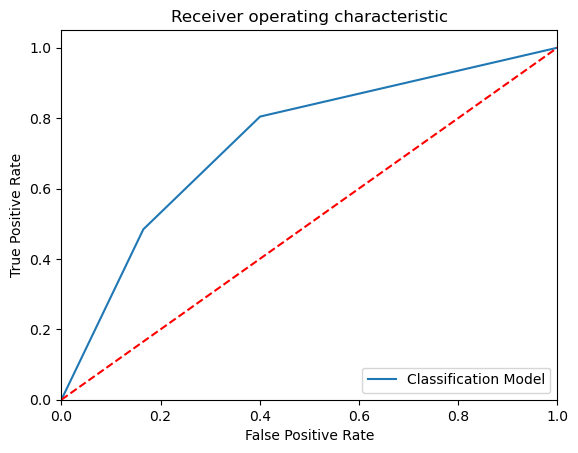

KNN_K_value =  3
Model Name:  KNeighborsClassifier(n_neighbors=3)
Confusion matrix : 
 [[4173 1978]
 [2934 7623]]
Outcome values : 
 4173 1978 2934 7623
Classification report : 
               precision    recall  f1-score   support

           1       0.59      0.68      0.63      6151
           0       0.79      0.72      0.76     10557

    accuracy                           0.71     16708
   macro avg       0.69      0.70      0.69     16708
weighted avg       0.72      0.71      0.71     16708

Accuracy : 70.6 %
Precision : 58.7 %
Recall : 67.8 %
F1 Score : 0.63
Specificity or True Negative Rate : 72.2 %
Balanced Accuracy : 70.0 %
MCC : 0.391
roc_auc_score: 0.7


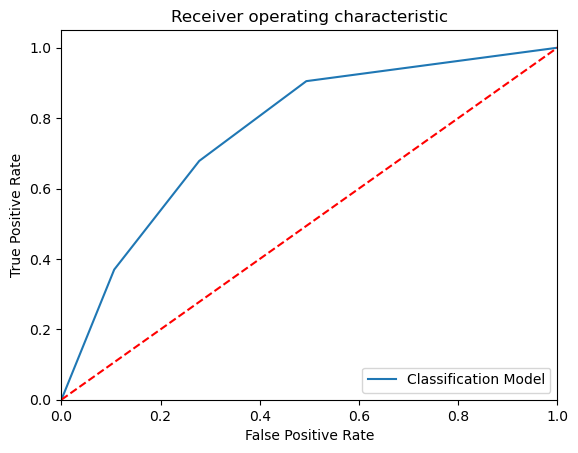

KNN_K_value =  4
Model Name:  KNeighborsClassifier(n_neighbors=4)
Confusion matrix : 
 [[3497 2654]
 [2107 8450]]
Outcome values : 
 3497 2654 2107 8450
Classification report : 
               precision    recall  f1-score   support

           1       0.62      0.57      0.59      6151
           0       0.76      0.80      0.78     10557

    accuracy                           0.72     16708
   macro avg       0.69      0.68      0.69     16708
weighted avg       0.71      0.72      0.71     16708

Accuracy : 71.5 %
Precision : 62.4 %
Recall : 56.9 %
F1 Score : 0.595
Specificity or True Negative Rate : 80.0 %
Balanced Accuracy : 68.4 %
MCC : 0.377
roc_auc_score: 0.684


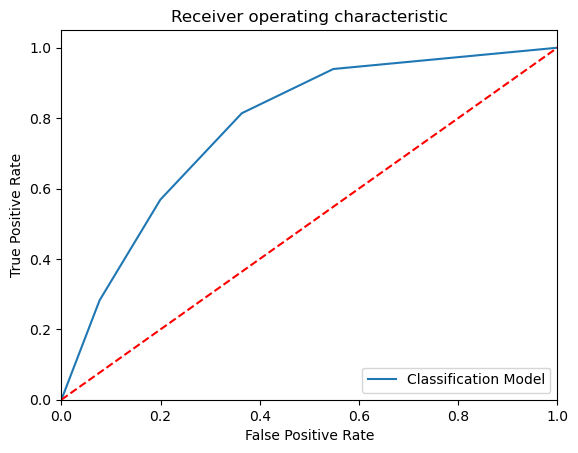

KNN_K_value =  5
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[4451 1700]
 [2968 7589]]
Outcome values : 
 4451 1700 2968 7589
Classification report : 
               precision    recall  f1-score   support

           1       0.60      0.72      0.66      6151
           0       0.82      0.72      0.76     10557

    accuracy                           0.72     16708
   macro avg       0.71      0.72      0.71     16708
weighted avg       0.74      0.72      0.72     16708

Accuracy : 72.1 %
Precision : 60.0 %
Recall : 72.4 %
F1 Score : 0.656
Specificity or True Negative Rate : 71.9 %
Balanced Accuracy : 72.2 %
MCC : 0.43
roc_auc_score: 0.721


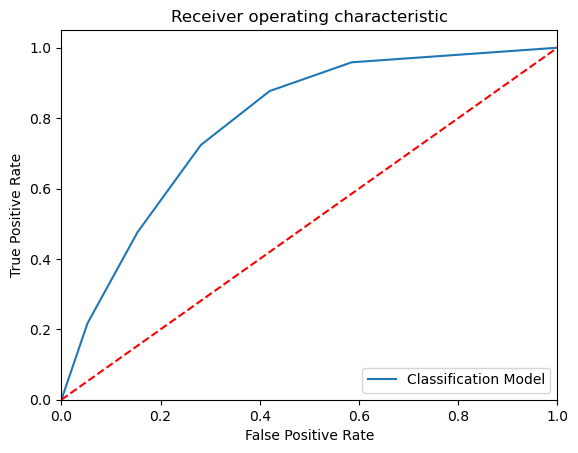

KNN_K_value =  6
Model Name:  KNeighborsClassifier(n_neighbors=6)
Confusion matrix : 
 [[3909 2242]
 [2382 8175]]
Outcome values : 
 3909 2242 2382 8175
Classification report : 
               precision    recall  f1-score   support

           1       0.62      0.64      0.63      6151
           0       0.78      0.77      0.78     10557

    accuracy                           0.72     16708
   macro avg       0.70      0.70      0.70     16708
weighted avg       0.72      0.72      0.72     16708

Accuracy : 72.3 %
Precision : 62.1 %
Recall : 63.6 %
F1 Score : 0.628
Specificity or True Negative Rate : 77.4 %
Balanced Accuracy : 70.5 %
MCC : 0.408
roc_auc_score: 0.705


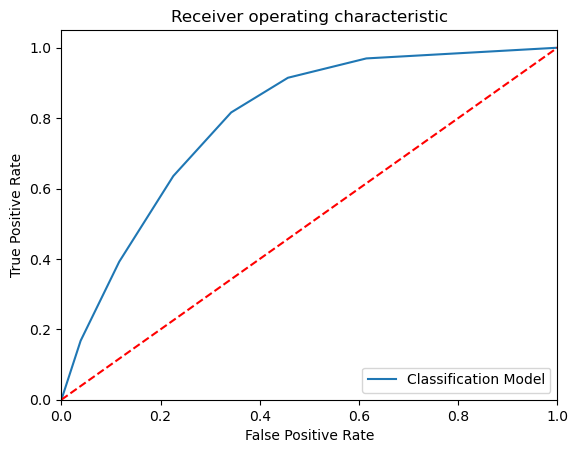

KNN_K_value =  7
Model Name:  KNeighborsClassifier(n_neighbors=7)
Confusion matrix : 
 [[4563 1588]
 [3035 7522]]
Outcome values : 
 4563 1588 3035 7522
Classification report : 
               precision    recall  f1-score   support

           1       0.60      0.74      0.66      6151
           0       0.83      0.71      0.76     10557

    accuracy                           0.72     16708
   macro avg       0.71      0.73      0.71     16708
weighted avg       0.74      0.72      0.73     16708

Accuracy : 72.3 %
Precision : 60.1 %
Recall : 74.2 %
F1 Score : 0.664
Specificity or True Negative Rate : 71.3 %
Balanced Accuracy : 72.8 %
MCC : 0.44
roc_auc_score: 0.727


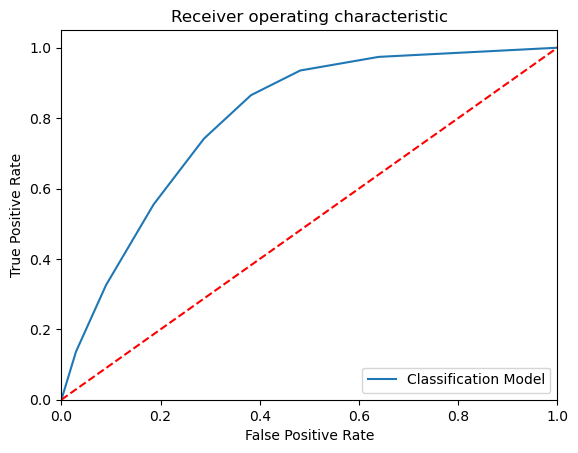

KNN_K_value =  8
Model Name:  KNeighborsClassifier(n_neighbors=8)
Confusion matrix : 
 [[4173 1978]
 [2578 7979]]
Outcome values : 
 4173 1978 2578 7979
Classification report : 
               precision    recall  f1-score   support

           1       0.62      0.68      0.65      6151
           0       0.80      0.76      0.78     10557

    accuracy                           0.73     16708
   macro avg       0.71      0.72      0.71     16708
weighted avg       0.73      0.73      0.73     16708

Accuracy : 72.7 %
Precision : 61.8 %
Recall : 67.8 %
F1 Score : 0.647
Specificity or True Negative Rate : 75.6 %
Balanced Accuracy : 71.7 %
MCC : 0.427
roc_auc_score: 0.717


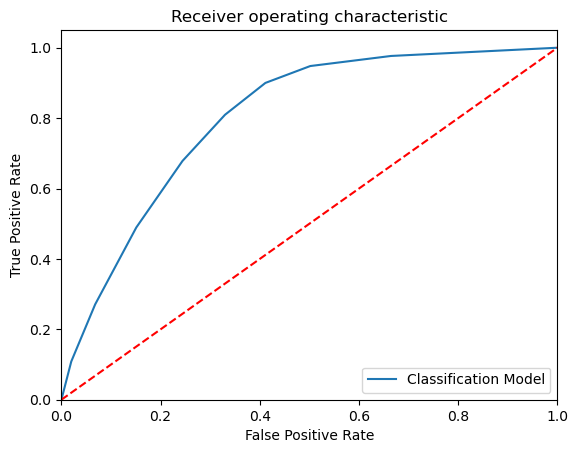

KNN_K_value =  9
Model Name:  KNeighborsClassifier(n_neighbors=9)
Confusion matrix : 
 [[4678 1473]
 [3049 7508]]
Outcome values : 
 4678 1473 3049 7508
Classification report : 
               precision    recall  f1-score   support

           1       0.61      0.76      0.67      6151
           0       0.84      0.71      0.77     10557

    accuracy                           0.73     16708
   macro avg       0.72      0.74      0.72     16708
weighted avg       0.75      0.73      0.73     16708

Accuracy : 72.9 %
Precision : 60.5 %
Recall : 76.1 %
F1 Score : 0.674
Specificity or True Negative Rate : 71.1 %
Balanced Accuracy : 73.6 %
MCC : 0.456
roc_auc_score: 0.736


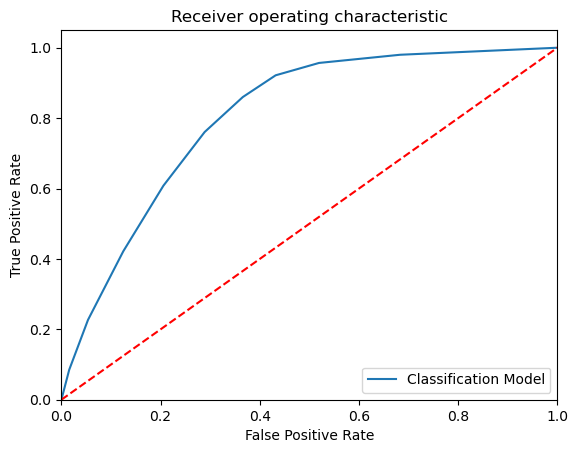

KNN_K_value =  10
Model Name:  KNeighborsClassifier(n_neighbors=10)
Confusion matrix : 
 [[4294 1857]
 [2674 7883]]
Outcome values : 
 4294 1857 2674 7883
Classification report : 
               precision    recall  f1-score   support

           1       0.62      0.70      0.65      6151
           0       0.81      0.75      0.78     10557

    accuracy                           0.73     16708
   macro avg       0.71      0.72      0.72     16708
weighted avg       0.74      0.73      0.73     16708

Accuracy : 72.9 %
Precision : 61.6 %
Recall : 69.8 %
F1 Score : 0.655
Specificity or True Negative Rate : 74.7 %
Balanced Accuracy : 72.2 %
MCC : 0.435
roc_auc_score: 0.722


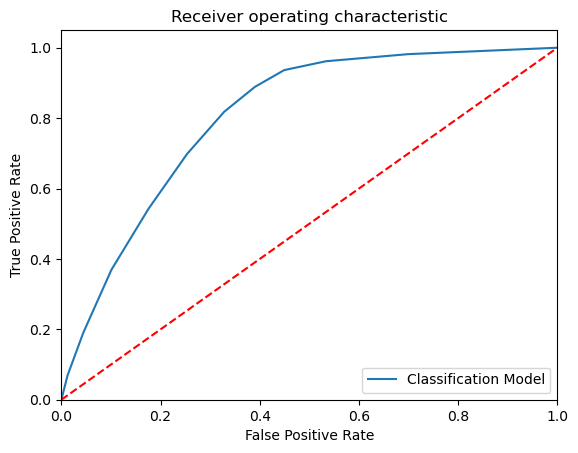

KNN_K_value =  11
Model Name:  KNeighborsClassifier(n_neighbors=11)
Confusion matrix : 
 [[4723 1428]
 [3110 7447]]
Outcome values : 
 4723 1428 3110 7447
Classification report : 
               precision    recall  f1-score   support

           1       0.60      0.77      0.68      6151
           0       0.84      0.71      0.77     10557

    accuracy                           0.73     16708
   macro avg       0.72      0.74      0.72     16708
weighted avg       0.75      0.73      0.73     16708

Accuracy : 72.8 %
Precision : 60.3 %
Recall : 76.8 %
F1 Score : 0.675
Specificity or True Negative Rate : 70.5 %
Balanced Accuracy : 73.6 %
MCC : 0.457
roc_auc_score: 0.737


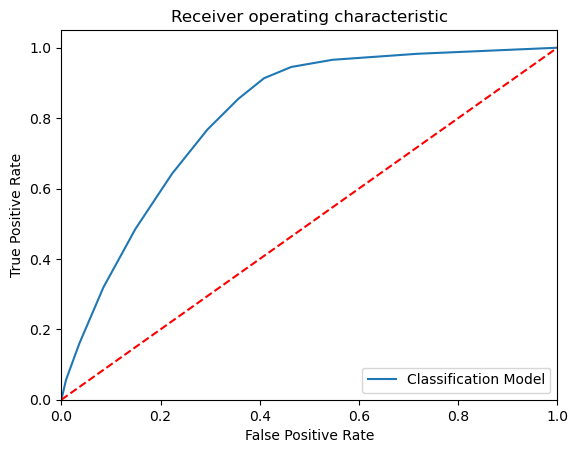

KNN_K_value =  12
Model Name:  KNeighborsClassifier(n_neighbors=12)
Confusion matrix : 
 [[4424 1727]
 [2761 7796]]
Outcome values : 
 4424 1727 2761 7796
Classification report : 
               precision    recall  f1-score   support

           1       0.62      0.72      0.66      6151
           0       0.82      0.74      0.78     10557

    accuracy                           0.73     16708
   macro avg       0.72      0.73      0.72     16708
weighted avg       0.74      0.73      0.73     16708

Accuracy : 73.1 %
Precision : 61.6 %
Recall : 71.9 %
F1 Score : 0.663
Specificity or True Negative Rate : 73.8 %
Balanced Accuracy : 72.8 %
MCC : 0.446
roc_auc_score: 0.729


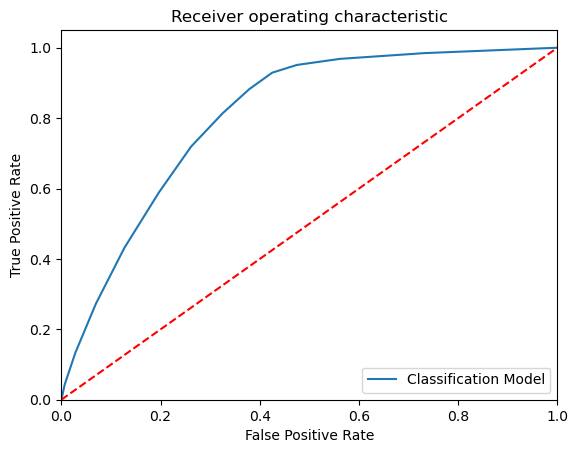

KNN_K_value =  13
Model Name:  KNeighborsClassifier(n_neighbors=13)
Confusion matrix : 
 [[4750 1401]
 [3122 7435]]
Outcome values : 
 4750 1401 3122 7435
Classification report : 
               precision    recall  f1-score   support

           1       0.60      0.77      0.68      6151
           0       0.84      0.70      0.77     10557

    accuracy                           0.73     16708
   macro avg       0.72      0.74      0.72     16708
weighted avg       0.75      0.73      0.73     16708

Accuracy : 72.9 %
Precision : 60.3 %
Recall : 77.2 %
F1 Score : 0.677
Specificity or True Negative Rate : 70.4 %
Balanced Accuracy : 73.8 %
MCC : 0.46
roc_auc_score: 0.738


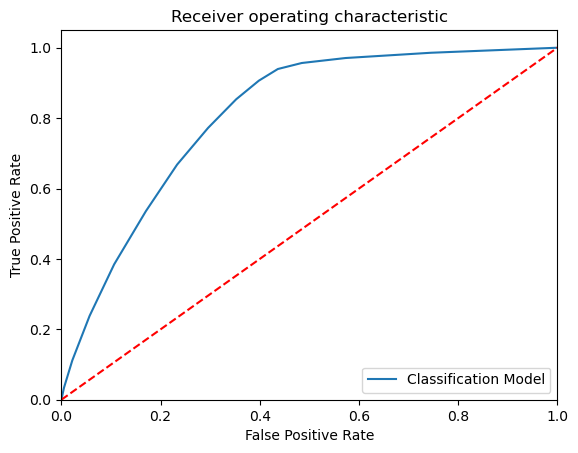

KNN_K_value =  14
Model Name:  KNeighborsClassifier(n_neighbors=14)
Confusion matrix : 
 [[4492 1659]
 [2831 7726]]
Outcome values : 
 4492 1659 2831 7726
Classification report : 
               precision    recall  f1-score   support

           1       0.61      0.73      0.67      6151
           0       0.82      0.73      0.77     10557

    accuracy                           0.73     16708
   macro avg       0.72      0.73      0.72     16708
weighted avg       0.75      0.73      0.74     16708

Accuracy : 73.1 %
Precision : 61.3 %
Recall : 73.0 %
F1 Score : 0.667
Specificity or True Negative Rate : 73.2 %
Balanced Accuracy : 73.1 %
MCC : 0.449
roc_auc_score: 0.731


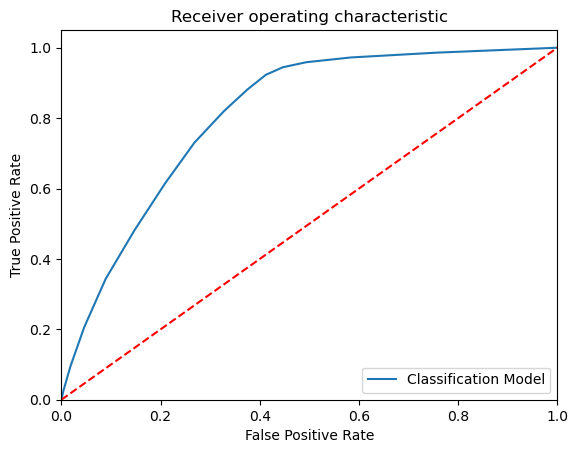

KNN_K_value =  15
Model Name:  KNeighborsClassifier(n_neighbors=15)
Confusion matrix : 
 [[4815 1336]
 [3181 7376]]
Outcome values : 
 4815 1336 3181 7376
Classification report : 
               precision    recall  f1-score   support

           1       0.60      0.78      0.68      6151
           0       0.85      0.70      0.77     10557

    accuracy                           0.73     16708
   macro avg       0.72      0.74      0.72     16708
weighted avg       0.76      0.73      0.73     16708

Accuracy : 73.0 %
Precision : 60.2 %
Recall : 78.3 %
F1 Score : 0.681
Specificity or True Negative Rate : 69.9 %
Balanced Accuracy : 74.1 %
MCC : 0.465
roc_auc_score: 0.741


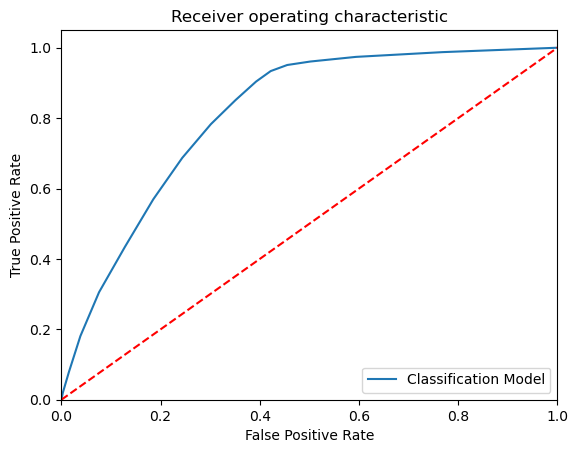

KNN_K_value =  16
Model Name:  KNeighborsClassifier(n_neighbors=16)
Confusion matrix : 
 [[4559 1592]
 [2917 7640]]
Outcome values : 
 4559 1592 2917 7640
Classification report : 
               precision    recall  f1-score   support

           1       0.61      0.74      0.67      6151
           0       0.83      0.72      0.77     10557

    accuracy                           0.73     16708
   macro avg       0.72      0.73      0.72     16708
weighted avg       0.75      0.73      0.73     16708

Accuracy : 73.0 %
Precision : 61.0 %
Recall : 74.1 %
F1 Score : 0.669
Specificity or True Negative Rate : 72.4 %
Balanced Accuracy : 73.2 %
MCC : 0.451
roc_auc_score: 0.732


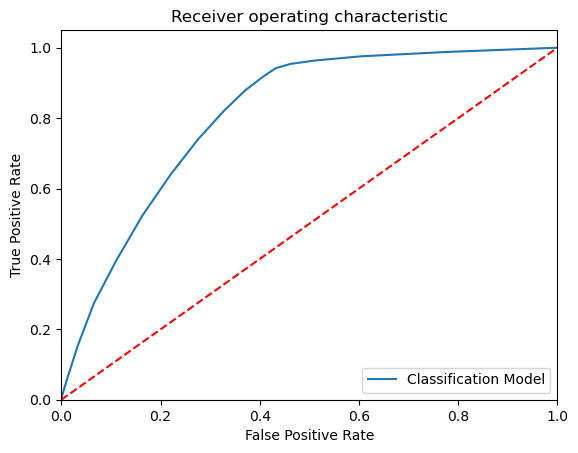

KNN_K_value =  17
Model Name:  KNeighborsClassifier(n_neighbors=17)
Confusion matrix : 
 [[4821 1330]
 [3218 7339]]
Outcome values : 
 4821 1330 3218 7339
Classification report : 
               precision    recall  f1-score   support

           1       0.60      0.78      0.68      6151
           0       0.85      0.70      0.76     10557

    accuracy                           0.73     16708
   macro avg       0.72      0.74      0.72     16708
weighted avg       0.76      0.73      0.73     16708

Accuracy : 72.8 %
Precision : 60.0 %
Recall : 78.4 %
F1 Score : 0.679
Specificity or True Negative Rate : 69.5 %
Balanced Accuracy : 74.0 %
MCC : 0.462
roc_auc_score: 0.739


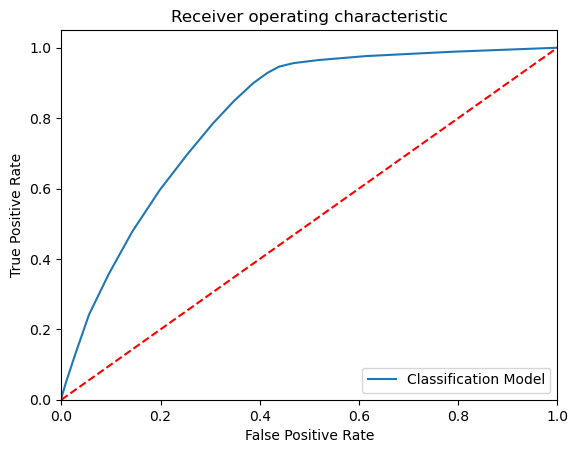

KNN_K_value =  18
Model Name:  KNeighborsClassifier(n_neighbors=18)
Confusion matrix : 
 [[4596 1555]
 [2975 7582]]
Outcome values : 
 4596 1555 2975 7582
Classification report : 
               precision    recall  f1-score   support

           1       0.61      0.75      0.67      6151
           0       0.83      0.72      0.77     10557

    accuracy                           0.73     16708
   macro avg       0.72      0.73      0.72     16708
weighted avg       0.75      0.73      0.73     16708

Accuracy : 72.9 %
Precision : 60.7 %
Recall : 74.7 %
F1 Score : 0.67
Specificity or True Negative Rate : 71.8 %
Balanced Accuracy : 73.2 %
MCC : 0.451
roc_auc_score: 0.733


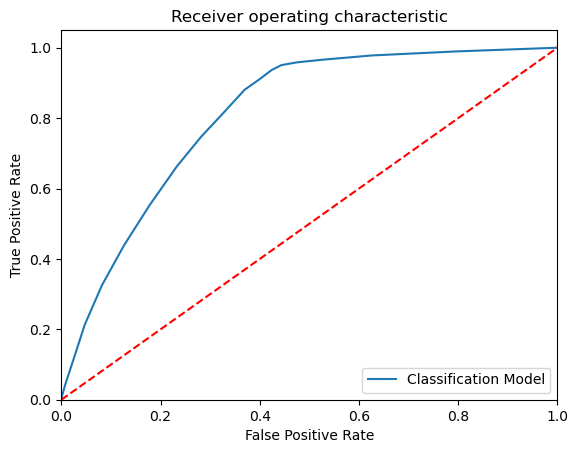

KNN_K_value =  19
Model Name:  KNeighborsClassifier(n_neighbors=19)
Confusion matrix : 
 [[4825 1326]
 [3220 7337]]
Outcome values : 
 4825 1326 3220 7337
Classification report : 
               precision    recall  f1-score   support

           1       0.60      0.78      0.68      6151
           0       0.85      0.69      0.76     10557

    accuracy                           0.73     16708
   macro avg       0.72      0.74      0.72     16708
weighted avg       0.76      0.73      0.73     16708

Accuracy : 72.8 %
Precision : 60.0 %
Recall : 78.4 %
F1 Score : 0.68
Specificity or True Negative Rate : 69.5 %
Balanced Accuracy : 74.0 %
MCC : 0.463
roc_auc_score: 0.74


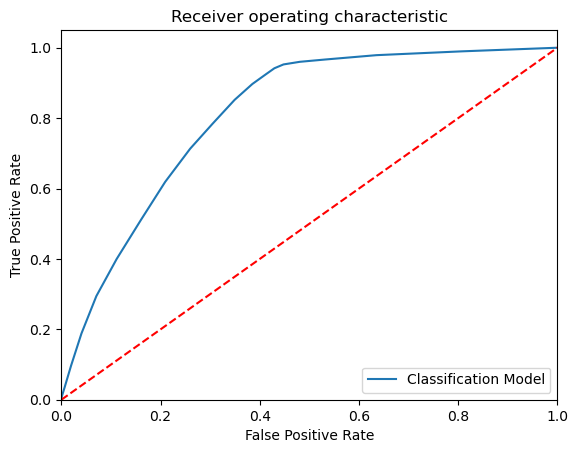

KNN_K_value =  20
Model Name:  KNeighborsClassifier(n_neighbors=20)
Confusion matrix : 
 [[4649 1502]
 [2991 7566]]
Outcome values : 
 4649 1502 2991 7566
Classification report : 
               precision    recall  f1-score   support

           1       0.61      0.76      0.67      6151
           0       0.83      0.72      0.77     10557

    accuracy                           0.73     16708
   macro avg       0.72      0.74      0.72     16708
weighted avg       0.75      0.73      0.74     16708

Accuracy : 73.1 %
Precision : 60.9 %
Recall : 75.6 %
F1 Score : 0.674
Specificity or True Negative Rate : 71.7 %
Balanced Accuracy : 73.6 %
MCC : 0.457
roc_auc_score: 0.736


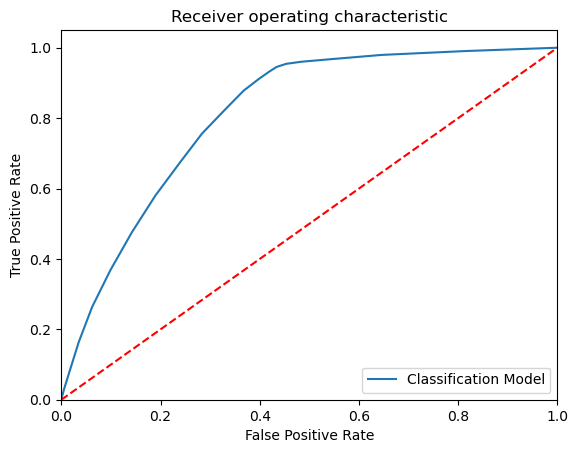

In [25]:
# Bild KNN Model

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import sklearn.metrics as metrics

from sklearn.metrics import roc_curve, roc_auc_score

accuracy = []

for a in range(1, 21, 1):
    
    k = a
    
    # Build the model
    
    ModelKNN = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model
    
    ModelKNN.fit(x_train, y_train)
    
    # Predict the model
    
    y_pred = ModelKNN.predict(x_test)
    y_pred_prob = ModelKNN.predict_proba(x_test)
    
    print('KNN_K_value = ', a)
    
    # Print the model name
    
    print('Model Name: ', ModelKNN)
    
    # confusion matrix in sklearn
    
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    
    # actual values
    
    actual = y_test
    
    # predicted values
    
    predicted = y_pred
    
    # confusion matrix
    
    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)
    
    # outcome values order in sklearn
    
    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)
    
    # classification report for precision, recall f1-score and accuracy
    
    C_Report = classification_report(actual,predicted,labels=[1,0])
    
    print('Classification report : \n', C_Report)
    
    # calculating the metrics
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model
    
    from math import sqrt
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    
    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)
    
    # Area under ROC curve 
    
    from sklearn.metrics import roc_curve, roc_auc_score
    
    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, ModelKNN.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    #plt.savefig('Log_ROC')
    plt.show()
    #------------------------------------------------------------------------------
    new_row = {'Model Name' : ModelKNN,
               'KNN K Value' : a,
               'True_Positive' : tp,
               'False_Negative' : fn,
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    KNN_Results = KNN_Results.append(new_row, ignore_index=True)
    #------KNN_Results------------------------------------------------------------------------

# SVM algorithm

In [26]:
#load the result dataset
EMResults=pd.read_csv(r"C:\Users\Dlc\Desktop\AIMLDS\EMResults.csv",header=0)
#display the first 5 records
EMResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  SVC(probability=True)
Confusion matrix : 
 [[5291  860]
 [3578 6979]]
Outcome values : 
 5291 860 3578 6979
Classification report : 
               precision    recall  f1-score   support

           1       0.60      0.86      0.70      6151
           0       0.89      0.66      0.76     10557

    accuracy                           0.73     16708
   macro avg       0.74      0.76      0.73     16708
weighted avg       0.78      0.73      0.74     16708

Accuracy : 73.4 %
Precision : 59.7 %
Recall : 86.0 %
F1 Score : 0.705
Specificity or True Negative Rate : 66.1 %
Balanced Accuracy : 76.0 %
MCC : 0.504
roc_auc_score: 0.761


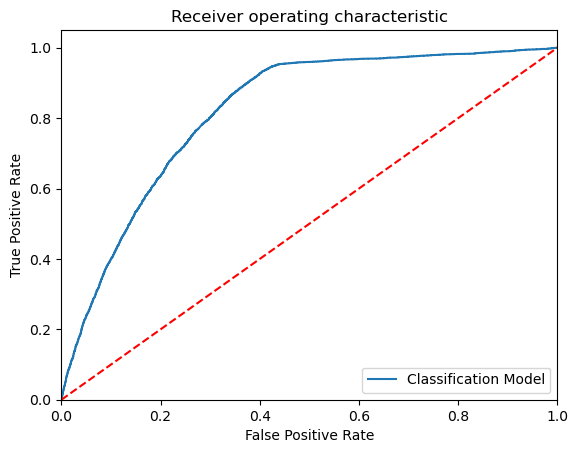

-----------------------------------------------------------------------------------------------------


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Create objects of classification algorithms with default hyper-parameters

#ModelLR = LogisticRegression()
#ModelDC = DecisionTreeClassifier()
#ModelRF = RandomForestClassifier()
#ModelET = ExtraTreesClassifier()
#ModelKNN = KNeighborsClassifier(n_neighbors=5)
#ModelGNB = GaussianNB()
ModelSVM = SVC(probability=True)

# Evalution matrix for all the algorithms

MM = [ModelSVM]
#MM = [ModelLR, ModelDC, ModelRF, ModelET,ModelKNN]
for models in MM:
            
    # Train the model training dataset
    
    models.fit(x_train, y_train)
    
    # Prediction the model with test dataset
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    Model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    #
    plt.plot(fpr, tpr, label= 'Classification Model' % Model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive': tp,
               'False_Negative': fn, 
               'False_Positive': fp, 
               'True_Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    EMResults = EMResults.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------
#======================================================================================================================>

# Build the Calssification models and compare the results

In [28]:
#load the result dataset
EMResults=pd.read_csv(r"C:\Users\Dlc\Desktop\AIMLDS\EMResults.csv",header=0)
#display the first 5 records
EMResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[5770  381]
 [4479 6078]]
Outcome values : 
 5770 381 4479 6078
Classification report : 
               precision    recall  f1-score   support

           1       0.56      0.94      0.70      6151
           0       0.94      0.58      0.71     10557

    accuracy                           0.71     16708
   macro avg       0.75      0.76      0.71     16708
weighted avg       0.80      0.71      0.71     16708

Accuracy : 70.9 %
Precision : 56.3 %
Recall : 93.8 %
F1 Score : 0.704
Specificity or True Negative Rate : 57.6 %
Balanced Accuracy : 75.7 %
MCC : 0.509
roc_auc_score: 0.757


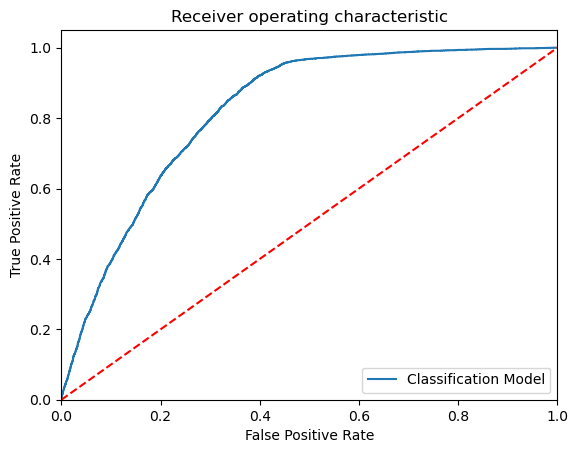

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[3410 2741]
 [3589 6968]]
Outcome values : 
 3410 2741 3589 6968
Classification report : 
               precision    recall  f1-score   support

           1       0.49      0.55      0.52      6151
           0       0.72      0.66      0.69     10557

    accuracy                           0.62     16708
   macro avg       0.60      0.61      0.60     16708
weighted avg       0.63      0.62      0.63     16708

Accuracy : 62.1 %
Precision : 48.7 %
Recall : 55.4 %
F1 Score : 0.519
Specificity or True Negative Rate : 66.0 %
Balanced Accuracy : 60.7 %
MCC : 0.21
roc_auc_score: 0.607


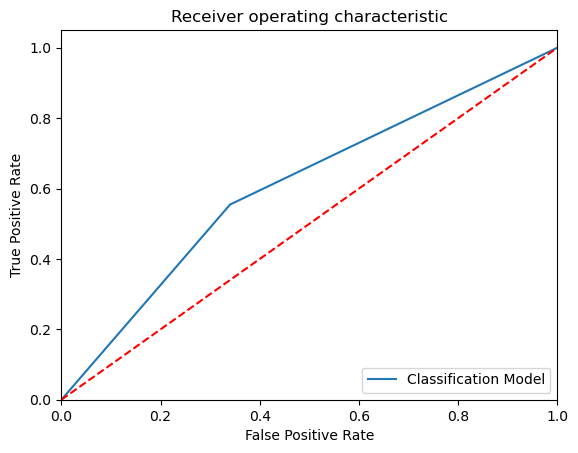

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[3974 2177]
 [2153 8404]]
Outcome values : 
 3974 2177 2153 8404
Classification report : 
               precision    recall  f1-score   support

           1       0.65      0.65      0.65      6151
           0       0.79      0.80      0.80     10557

    accuracy                           0.74     16708
   macro avg       0.72      0.72      0.72     16708
weighted avg       0.74      0.74      0.74     16708

Accuracy : 74.1 %
Precision : 64.9 %
Recall : 64.6 %
F1 Score : 0.647
Specificity or True Negative Rate : 79.6 %
Balanced Accuracy : 72.1 %
MCC : 0.442
roc_auc_score: 0.721


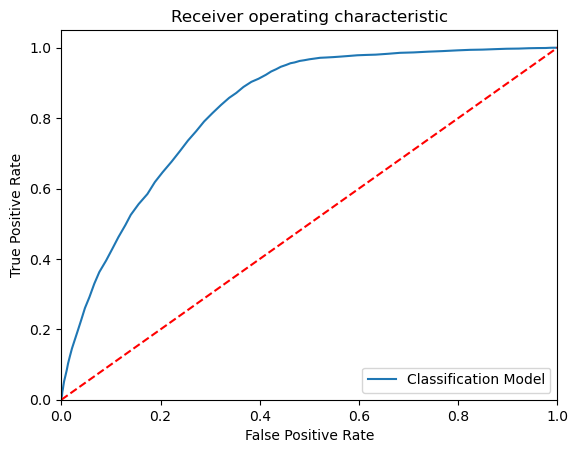

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[4834 1317]
 [2909 7648]]
Outcome values : 
 4834 1317 2909 7648
Classification report : 
               precision    recall  f1-score   support

           1       0.62      0.79      0.70      6151
           0       0.85      0.72      0.78     10557

    accuracy                           0.75     16708
   macro avg       0.74      0.76      0.74     16708
weighted avg       0.77      0.75      0.75     16708

Accuracy : 74.7 %
Precision : 62.4 %
Recall : 78.6 %
F1 Score : 0.696
Specificity or True Negative Rate : 72.4 %
Balanced Accuracy : 75.5 %
MCC : 0.494
roc_auc_score: 0.755


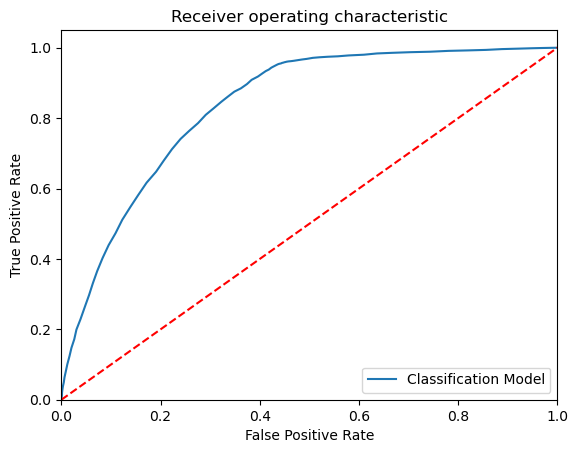

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[4451 1700]
 [2968 7589]]
Outcome values : 
 4451 1700 2968 7589
Classification report : 
               precision    recall  f1-score   support

           1       0.60      0.72      0.66      6151
           0       0.82      0.72      0.76     10557

    accuracy                           0.72     16708
   macro avg       0.71      0.72      0.71     16708
weighted avg       0.74      0.72      0.72     16708

Accuracy : 72.1 %
Precision : 60.0 %
Recall : 72.4 %
F1 Score : 0.656
Specificity or True Negative Rate : 71.9 %
Balanced Accuracy : 72.2 %
MCC : 0.43
roc_auc_score: 0.721


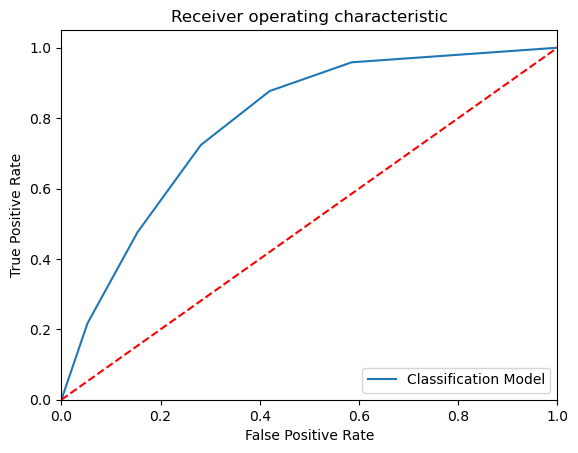

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[1825 4326]
 [ 959 9598]]
Outcome values : 
 1825 4326 959 9598
Classification report : 
               precision    recall  f1-score   support

           1       0.66      0.30      0.41      6151
           0       0.69      0.91      0.78     10557

    accuracy                           0.68     16708
   macro avg       0.67      0.60      0.60     16708
weighted avg       0.68      0.68      0.65     16708

Accuracy : 68.4 %
Precision : 65.6 %
Recall : 29.7 %
F1 Score : 0.409
Specificity or True Negative Rate : 90.9 %
Balanced Accuracy : 60.3 %
MCC : 0.266
roc_auc_score: 0.603


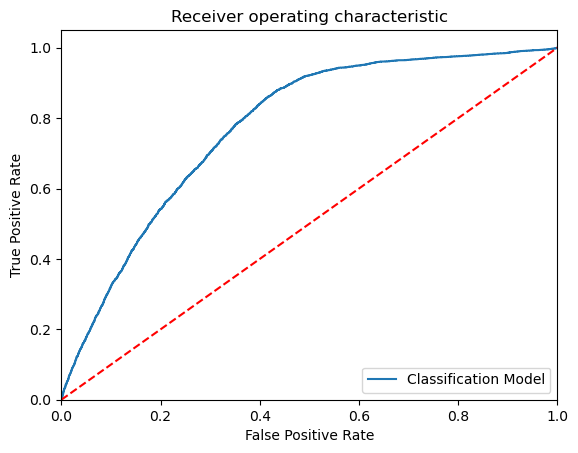

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(probability=True)
Confusion matrix : 
 [[5291  860]
 [3578 6979]]
Outcome values : 
 5291 860 3578 6979
Classification report : 
               precision    recall  f1-score   support

           1       0.60      0.86      0.70      6151
           0       0.89      0.66      0.76     10557

    accuracy                           0.73     16708
   macro avg       0.74      0.76      0.73     16708
weighted avg       0.78      0.73      0.74     16708

Accuracy : 73.4 %
Precision : 59.7 %
Recall : 86.0 %
F1 Score : 0.705
Specificity or True Negative Rate : 66.1 %
Balanced Accuracy : 76.0 %
MCC : 0.504
roc_auc_score: 0.761


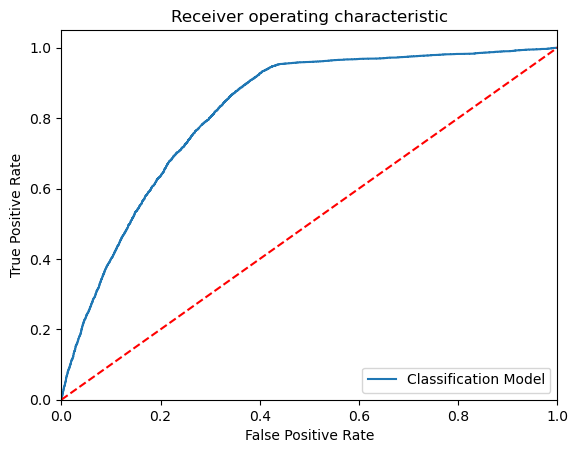

-----------------------------------------------------------------------------------------------------


In [29]:
#==Step_02=============================================================================================================>

# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Create objects of classification algorithms with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelGNB = GaussianNB()
ModelSVM = SVC(probability=True)

# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelGNB, ModelSVM]
#MM = [ModelLR, ModelDC, ModelRF, ModelET,ModelKNN]
for models in MM:
            
    # Train the model training dataset
    
    models.fit(x_train, y_train)
    
    # Prediction the model with test dataset
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    Model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    #
    plt.plot(fpr, tpr, label= 'Classification Model' % Model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive': tp,
               'False_Negative': fn, 
               'False_Positive': fp, 
               'True_Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    EMResults = EMResults.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------
#======================================================================================================================>

In [30]:
#Results with comparing  the all the algorithms
EMResults

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),5770,381,4479,6078,0.709,0.563,0.938,0.704,0.576,0.509,0.756895,0.757
1,DecisionTreeClassifier(),3410,2741,3589,6968,0.621,0.487,0.554,0.519,0.660,0.210,0.607209,0.607
2,"(DecisionTreeClassifier(max_features='auto', r...",3974,2177,2153,8404,0.741,0.649,0.646,0.647,0.796,0.442,0.721067,0.721
3,"(ExtraTreeClassifier(random_state=1044005416),...",4834,1317,2909,7648,0.747,0.624,0.786,0.696,0.724,0.494,0.755168,0.755
4,KNeighborsClassifier(),4451,1700,2968,7589,0.721,0.600,0.724,0.656,0.719,0.430,0.721241,0.722
5,GaussianNB(),1825,4326,959,9598,0.684,0.656,0.297,0.409,0.909,0.266,0.602930,0.603
6,SVC(probability=True),5291,860,3578,6979,0.734,0.597,0.860,0.705,0.661,0.504,0.760632,0.760


In [36]:
#prediction the model with ModelDC
y_pred1=ModelDC.predict(x_test)

# display the final results

In [37]:
#display the final results 
Results = pd.DataFrame({'smoking_A':y_test, 'smoking_P':y_pred})
#Merge two Dataframes on index of both the dataframes
ResultsFinal = smokingEffect.merge(Results,left_index=True,right_index=True)
# Calculate the %of Error
ResultsFinal['%Error'] = round(((ResultsFinal['smoking_A']-ResultsFinal['smoking_P'])/ResultsFinal['smoking_A'])*100,3)
#display 10 records randomly
ResultsFinal.sample(10)

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking,smoking_A,smoking_P,%Error
16307,0,30,180,80,91.5,1.0,1.2,1.0,1.0,127.0,84.0,97.0,268.0,157.0,51.0,186.0,15.7,1.0,0.9,23.0,24.0,40.0,0,0,0,1,1,1,0.0
48194,0,25,185,75,79.0,1.0,1.0,1.0,1.0,131.0,67.0,89.0,184.0,107.0,67.0,96.0,16.2,1.0,0.9,31.0,30.0,19.0,0,1,0,0,0,1,-inf
34649,0,55,170,75,85.1,1.2,0.6,1.0,1.0,118.0,78.0,100.0,220.0,49.0,57.0,153.0,15.8,1.0,0.8,23.0,43.0,36.0,0,0,0,0,0,1,-inf
41799,0,45,175,70,78.0,1.0,1.5,1.0,1.0,118.0,74.0,87.0,231.0,79.0,63.0,152.0,16.1,1.0,1.1,24.0,18.0,34.0,0,0,1,1,1,1,0.0
38527,0,60,165,70,87.2,1.2,1.2,1.0,1.0,130.0,80.0,94.0,204.0,179.0,47.0,121.0,15.6,1.0,1.0,32.0,33.0,39.0,0,1,1,0,0,1,-inf
33517,0,20,175,70,77.0,1.0,1.5,1.0,1.0,102.0,62.0,85.0,151.0,59.0,64.0,75.0,14.9,1.0,1.0,22.0,19.0,13.0,0,0,1,0,0,0,NaN
17063,0,25,175,95,97.0,1.0,1.0,1.0,1.0,133.0,82.0,93.0,198.0,143.0,57.0,112.0,16.1,3.0,1.1,29.0,33.0,31.0,0,0,0,1,1,1,0.0
37225,0,55,175,75,88.0,0.7,1.0,1.0,1.0,113.0,74.0,109.0,100.0,162.0,26.0,42.0,15.0,1.0,1.0,24.0,29.0,55.0,0,0,1,1,1,1,0.0
42857,1,50,155,60,74.0,0.6,0.6,1.0,1.0,115.0,57.0,81.0,211.0,98.0,77.0,114.0,10.9,1.0,0.8,20.0,13.0,11.0,0,0,1,0,0,0,NaN
49628,0,30,170,75,87.0,1.5,1.5,1.0,1.0,115.0,70.0,101.0,186.0,93.0,38.0,129.0,15.1,2.0,0.8,22.0,25.0,15.0,0,0,0,0,0,1,-inf


In [38]:
ResultsFinal

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking,smoking_A,smoking_P,%Error
1,1,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,70.0,130.0,192.0,115.0,42.0,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,0,0,0,0,0,NaN
4,1,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,74.0,80.0,184.0,74.0,62.0,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,0,1,0,0,0,NaN
6,0,40,160,60,85.5,1.0,1.0,1.0,1.0,116.0,82.0,94.0,226.0,68.0,55.0,157.0,17.0,1.0,0.7,21.0,27.0,39.0,0,1,0,1,1,1,0.0
7,0,45,165,90,96.0,1.2,1.0,1.0,1.0,153.0,96.0,158.0,222.0,269.0,34.0,134.0,15.0,1.0,1.3,38.0,71.0,111.0,0,0,0,0,0,1,-inf
11,0,30,170,75,87.0,1.2,1.2,1.0,1.0,124.0,78.0,101.0,184.0,197.0,39.0,106.0,17.9,1.0,1.1,34.0,69.0,64.0,0,0,0,0,0,1,-inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55669,0,60,160,60,79.0,1.0,0.7,1.0,1.0,103.0,67.0,108.0,177.0,67.0,49.0,115.0,14.1,1.0,1.2,18.0,14.0,14.0,0,0,0,0,0,1,-inf
55672,1,50,160,55,84.0,1.0,1.0,1.0,1.0,109.0,66.0,90.0,208.0,88.0,58.0,132.0,13.1,1.0,0.9,23.0,18.0,18.0,0,0,0,0,0,0,NaN
55676,1,40,150,45,72.0,1.0,1.0,1.0,1.0,110.0,76.0,92.0,172.0,98.0,56.0,96.0,12.5,1.0,0.6,21.0,19.0,15.0,0,0,0,0,0,0,NaN
55678,0,50,160,65,83.7,0.9,0.9,1.0,2.0,142.0,80.0,114.0,203.0,370.0,49.0,80.0,14.7,1.0,0.8,31.0,32.0,63.0,0,0,1,0,0,1,-inf


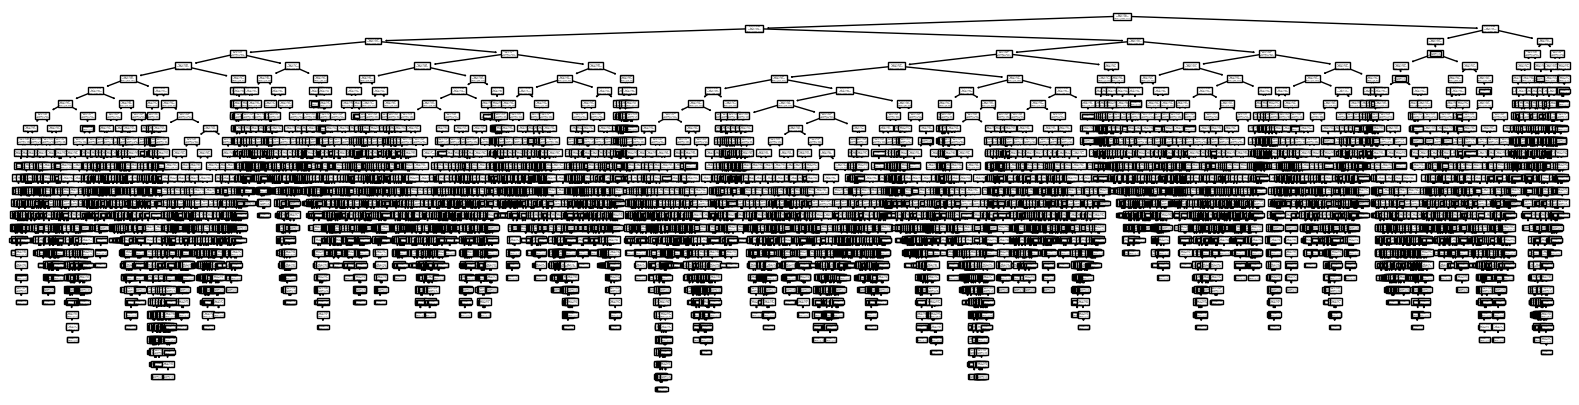

In [40]:
#plot the decision tree
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(20,5))
tree.plot_tree(ModelDC);